In [311]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroplan import Observer, FixedTarget
from astropy.time import Time
from astropy.table import Table

In [312]:
SUTHERLAND_OBSERVATORY = Observer.at_site("salt")


# Get the current date
current_date = Time.now()

# Define the time for 6 PM UTC today
time_window_start = Time(current_date.iso.split(" ")[0] + " 18:00:00")

# Define the time range from 6 PM today to 6 AM tomorrow
time_range_early = Time([time_window_start, time_window_start + 3 * u.hour])
time_range_mid = Time([time_window_start + 3 * u.hour, time_window_start + 6 * u.hour])
time_range_late = Time([time_window_start + 6 * u.hour, time_window_start + 9 * u.hour])

# Print the time range
print(time_range_early)
print(time_range_mid)
print(time_range_late)

['2024-04-27 18:00:00.000' '2024-04-27 21:00:00.000']
['2024-04-27 21:00:00.000' '2024-04-28 00:00:00.000']
['2024-04-28 00:00:00.000' '2024-04-28 03:00:00.000']


In [313]:
eso_spectroscopic_standard_stars = Table.read(
    "eso_ra_ordered_spectrosopic_standards.txt", format="csv"
)

filtered_spectroscopic_standard_stars = eso_spectroscopic_standard_stars[
    eso_spectroscopic_standard_stars["visual_mag"] <= 11
]

spectral_standards_targets = [
    FixedTarget(coord=SkyCoord(ra_dec, unit=(u.hourangle, u.deg)), name=name)
    for name, ra_dec, visual_mag, spec_type, note in filtered_spectroscopic_standard_stars
]

print(filtered_spectroscopic_standard_stars)

   name         ra_dec_(J2000)     visual_mag spec_type Note
---------- ----------------------- ---------- --------- ----
    HR9087 00 01 49.42 -03 01 39.0       5.12     B7III   --
     HR153 00 36 58.30 +53 53 48.9       3.66      B2IV   --
     HR718 02 28 09.54 +08 27 36.2       4.28     B9III   --
    HR1544 04 50 36.69 +08 54 00.7       4.36       A1V   --
    HR1996 05 45 59.92 -32 18 23.4       5.17       O9V Mod.
   HILT600 06 45 13.33 +02 08 14.1      10.44        B1   --
   HD49798 06 48 04.64 -44 18 59.3        8.3        O6 Mod.
   HD60753 07 33 27.26 -50 35 03.7        6.7      B3IV Mod.
 BD+75d325 08 10 49.31 +74 57 57.5       9.54       O5p   --
    HR3454 08 43 13.46 +03 23 55.1        4.3       B3V   --
   HD93521 10 48 23.51 +37 34 12.8       7.04      O9Vp   --
    HR4468 11 36 40.91 -09 48 08.2        4.7     B9.5V   --
    HR4554 11 53 49.83 +53 41 41.1       2.44       A0V Mod.
   Feige66 12 37 23.55 +25 04 00.3       10.5       sdO   --
    HR4963 13 09 56.96 -

In [314]:
from astroplan import AltitudeConstraint, AirmassConstraint, AtNightConstraint, MoonSeparationConstraint

constraints = [
    AltitudeConstraint(30 * u.deg, 80 * u.deg),
    AirmassConstraint(5),
    AtNightConstraint.twilight_astronomical(),
    MoonSeparationConstraint(1 * u.degree)
]

In [124]:
""" from astroplan import is_observable, is_always_observable

# Are targets *ever* observable in the time range?
ever_observable = is_observable(
    constraints,
    SUTHERLAND_OBSERVATORY,
    spectral_standards_targets,
    time_range=time_range,
)

# Are targets *always* observable in the time range?
always_observable = is_always_observable(
    constraints,
    SUTHERLAND_OBSERVATORY,
    spectral_standards_targets,
    time_range=time_range,
)

observability_table = Table()
observability_table["target"] = [target.name for target in spectral_standards_targets]
observability_table["ever_observable"] = ever_observable
observability_table["always_observable"] = always_observable
observability_table["Visual Mag"] = filtered_spectroscopic_standard_stars["visual_mag"]
print(observability_table) """

' from astroplan import is_observable, is_always_observable\n\n# Are targets *ever* observable in the time range?\never_observable = is_observable(\n    constraints,\n    SUTHERLAND_OBSERVATORY,\n    spectral_standards_targets,\n    time_range=time_range,\n)\n\n# Are targets *always* observable in the time range?\nalways_observable = is_always_observable(\n    constraints,\n    SUTHERLAND_OBSERVATORY,\n    spectral_standards_targets,\n    time_range=time_range,\n)\n\nobservability_table = Table()\nobservability_table["target"] = [target.name for target in spectral_standards_targets]\nobservability_table["ever_observable"] = ever_observable\nobservability_table["always_observable"] = always_observable\nobservability_table["Visual Mag"] = filtered_spectroscopic_standard_stars["visual_mag"]\nprint(observability_table) '

In [315]:
from astroplan import observability_table

observability_early = observability_table(
    constraints,
    SUTHERLAND_OBSERVATORY,
    spectral_standards_targets,
    time_range=time_range_early,
)

observability_mid = observability_table(
    constraints,
    SUTHERLAND_OBSERVATORY,
    spectral_standards_targets,
    time_range=time_range_mid,
)

observability_late = observability_table(
    constraints,
    SUTHERLAND_OBSERVATORY,
    spectral_standards_targets,
    time_range=time_range_late,
)

possible_candidates_early = observability_early[observability_early["fraction of time observable"] >= 0.4]
possible_candidates_mid = observability_mid[observability_mid["fraction of time observable"] >= 0.4]
possible_candidates_late = observability_late[observability_late["fraction of time observable"] >= 0.4]

print(possible_candidates_early)
print(possible_candidates_mid)
print(possible_candidates_late)

target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
    HD49798            True             False          0.8333333333333334
    HD60753            True              True                         1.0
     HR3454            True             False          0.8333333333333334
     HR4468            True              True                         1.0
     HR4963            True              True                         1.0
 CD-32d9927            True              True                         1.0
     HR5501            True             False                         0.5
target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
     HR4468            True              True                         1.0
    Feige66            True             False                         0.5
     HR4963            True           

In [318]:
import random

# Assuming you have three separate tables named table1, table2, and table3
# Each table has a column named 'name' which contains the names

# Function to randomly select a row from a table
def select_random_row(table):
    if len(table) == 0:
        return None
    return random.choice(table)

# Function to choose a distinct random row from each table based on the name
def choose_distinct_random_rows(table1, table2, table3):
    while True:
        random_row_table1 = select_random_row(table1)
        random_row_table2 = select_random_row(table2)
        random_row_table3 = select_random_row(table3)
        
        # Check if all tables have rows
        if random_row_table1 is None or random_row_table2 is None or random_row_table3 is None:
            return None
        
        # Check if all names are distinct
        if (random_row_table1['target name'] != random_row_table2['target name'] and
            random_row_table1['target name'] != random_row_table3['target name'] and
            random_row_table2['target name'] != random_row_table3['target name']):
            return random_row_table1['target name'], random_row_table2['target name'], random_row_table3['target name']

# Choose three distinct random rows based on the name
selected_rows = choose_distinct_random_rows(possible_candidates_early, possible_candidates_mid, possible_candidates_late)

if selected_rows is not None:
     
    # Print the selected rows
    print(selected_rows)
else:
    print("At least one table is empty or does not contain any new rows.")

('HR4468', 'HR5501', 'LTT7379')


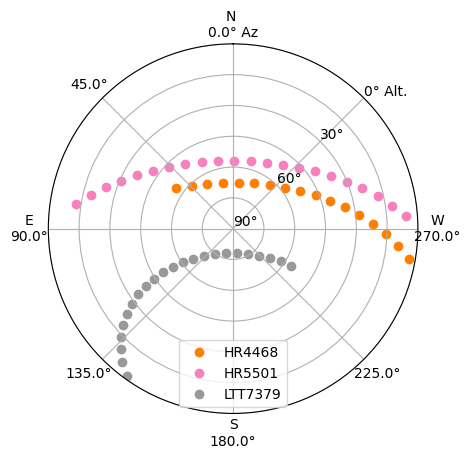

In [319]:
from astroplan.plots import plot_sky
from astroplan import Observer, FixedTarget

import matplotlib.pyplot as plt
from matplotlib import cm
from astropy.time import Time
from astropy.coordinates import SkyCoord
import astropy.units as u



# Get grid of times within the time_range limits
from astroplan import time_grid_from_range
time_range = Time([time_window_start, time_window_start + 12 * u.hour])
time_grid = time_grid_from_range(time_range)

plt.figure(figsize=(6,6))
cmap = cm.Set1             # Cycle through this colormap

for i, target in enumerate(spectral_standards_targets):

    if target.name in selected_rows:
        ax = plot_sky(target, SUTHERLAND_OBSERVATORY, time_grid,
                    style_kwargs=dict(color=cmap(float(i)/len(spectral_standards_targets)),
                                        label=target.name))

    legend = ax.legend(loc='lower center')
    legend.get_frame().set_facecolor('w')
    
    
plt.show()